## Describing a Single Set of Data

In [1]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

we can use **Histogram**

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

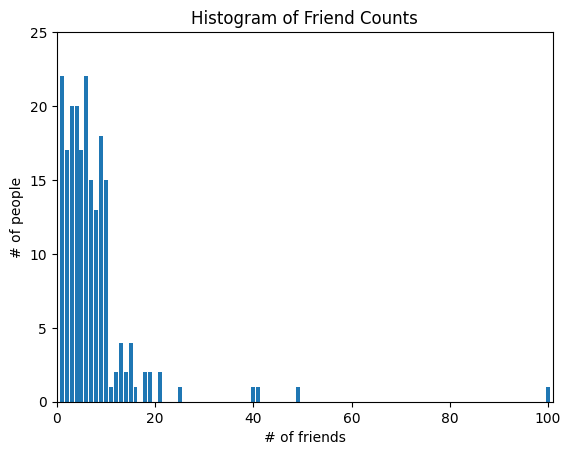

In [3]:
friend_counts = Counter(num_friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of freinds
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title('Histogram of Friend Counts')
plt.xlabel("# of friends")
plt.ylabel('# of people')
plt.show()

**Number of Data Points**

In [4]:
num_points = len(num_friends)
num_points

204

**Max and Min Values**

In [5]:
largest_value = max(num_friends)
largest_value

100.0

In [6]:
smallest_value = min(num_friends)
smallest_value

1

**Values of Specific positions**

In [7]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
smallest_value

1

In [8]:
second_smallest_value = sorted_values[1]
second_smallest_value

1

In [9]:
second_largest_value = sorted_values[-2]
second_largest_value

49

## Central Tendencies

**Mean** sum of the data divided by its count

In [10]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

In [11]:
mean(num_friends)

7.333333333333333

**Median** middle value of a sorted list

In [12]:
# The underscores indicate that these are "private" functions, as they're intended  to be called by our median function
# but not other people using our statistics library.

def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs)//2]

In [13]:
def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2 # e.g length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [14]:
def median(v: List[float]) -> float:
    """Finds the 'middle-most'value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [15]:
assert median([1, 10, 2, 9, 5]) == 5

In [16]:
assert median([1, 9, 2, 10]) == ( 2 + 9 ) / 2

In [17]:
print(median(num_friends))

6.0


**Quantile** A generalization of the median

In [18]:
def quantile(xs: List[float], p: float )-> float:
    """Return the pth-perecntile value in x"""
    p_index = int(p * len(xs))
    return sorted (xs)[p_index]

In [19]:
assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

**Mode** most common value

In [20]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [21]:
assert set(mode(num_friends)) == {1, 6}

## Dispersion

**Range** difference between the largest and smallest elements

In [22]:
# 'range' already means something in Python, so we'll use a different name 

def data_range(xs: List[float]) -> float:
    return max(xs) - min (xs)

In [23]:
assert data_range(num_friends) == 99

**Variance**

In [24]:
Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares (v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [25]:
def de_mean(xs: List[float]) -> List[float]:
    """ Translate xs bu subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

In [26]:
def variance (xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

In [27]:
assert 81.54 < variance (num_friends) < 81.55